<a href="https://colab.research.google.com/github/venussar/Numerical-Representation-Errors-and-Stability/blob/main/LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1:

Make a figure where is compared the values obtained for the two methods for calculating  π  as a function of the number of performed iterations.

Which method reaches a faster convergence? Which approximation takes less terms for achieving a good accuracy of the pi number?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The Leibniz series


In [ ]:
def numeropi(a):
    suma = 0
    for i in range(a+1):
        suma += ((-1) ** i) / (2 * i + 1)
    return 4 * suma



In [ ]:
numeropi(10000)

3.1416926435905346

The Viète series




In [ ]:
def calculo(numero):
  Pn= (np.sqrt(2)/2)
  multiplicacion=Pn
  for numero in range(1,numero+1):
    Pn=(np.sqrt(2+2*Pn)/2)
    multiplicacion*=  Pn
  return 2/multiplicacion


In [ ]:
calculo(10)

np.float64(3.1415923455701176)

ANALISIS



CONVERGENCIA

In [ ]:
valores= np.logspace(1,4, num=100, dtype=int)
pi_leibniz = [numeropi(N) for N in valores]
pi_viete   = [calculo(N) for N in valores]

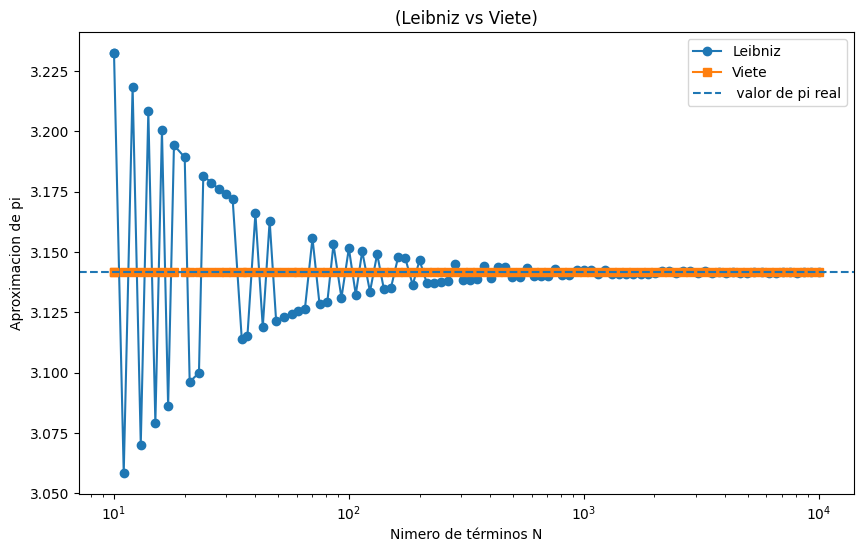

In [ ]:

# Generamos 100 valores de N distribuidos logarítmicamente entre 10 y 10000
# (usamos logspace para que el eje x sea logarítmico)
valores = np.logspace(1, 4, num=100, dtype=int)

# Calculamos las aproximaciones de pi usando las dos funciones:
# numeropi(N) = metodo de Leibniz
# calculo(N)  = metodo de Viete
pi_leibniz = [numeropi(N) for N in valores]
pi_viete   = [calculo(N) for N in valores]

# Cree la figura
plt.figure(figsize=(10,6))

# Dibuje las aproximaciones de Leibniz
plt.plot(valores, pi_leibniz, 'o-', label="Leibniz")

# Dibuje las aproximaciones de Viète
plt.plot(valores, pi_viete, 's-', label="Viete")

# Dibuje una línea horizontal con el valor real de pi
plt.axhline(np.pi, linestyle='--', label=" valor de pi real")

# Como usamos logspace para N, ponemos el eje x en escala logarítmica
plt.xscale("log")

# Etiquetas de los ejes y título
plt.xlabel("Nimero de términos N")
plt.ylabel("Aproximacion de pi")
plt.title("(Leibniz vs Viete)")

# Añadimos la leyenda
plt.legend()

# Mostramos la gráfica
plt.show()


la serie de Leibniz. Comienza muy lejos de pi y oscila mucho.Con mes terminos, las oscilaciones se van haciendo más pequeñas y se acerca lentamente al valor real de π. Es un metodo lento y con mucha variacion al principio, En cambio el metodo de viete Desde el principio, está mucho más cerca del valor real de π.Las variaciones son mínimas.Es un método más preciso y estable desde el principio (no necesita tantos valores)

ERROR

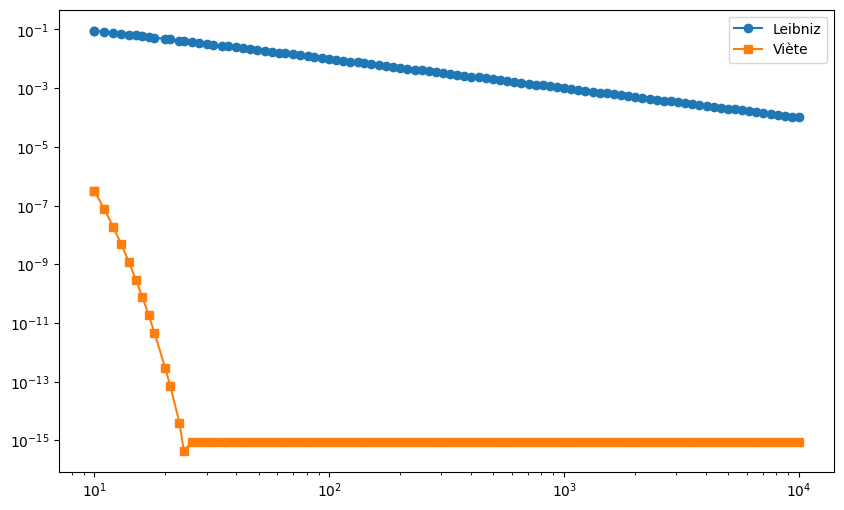

In [ ]:
import numpy as np

# Error absoluto
error_leibniz = [abs(p - np.pi) for p in pi_leibniz] #asb (valor absoluto) #itera con p la lista pi_leiniz
error_viete   = [abs(p - np.pi) for p in pi_viete] #itera con p en la lista pi_viete antes hecha

plt.figure(figsize=(10,6))
plt.loglog(valores, error_leibniz, 'o-', label="Leibniz")
plt.plot(valores, error_viete, 's-', label="Viète")
plt.legend()


En lebniz error disminuye muy despacio. en cambio el de viete El error cae muy rapido. A partir de cierto punto es una recta porque el límite de precisión numérica de 64 bits ya no permite distinguir más dígitos de pi. Esto indica que la convergencia es exponencial y mucho más eficiente que la de Leibniz.